In [2]:
from sys import platform as _platform
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
#if _platform =='linux2':
#    path = '../data/data_sleep/' 
#else:
#    #mets ton path ici et ça devrait marcher :)
#    path = ""
path = "./data/"

In [14]:
frequencies=pd.read_csv(path+"data_frequences.csv").drop("Unnamed: 0", axis=1)
stats=pd.read_csv(path+"data_stat_feats.csv").drop("Unnamed: 0", axis=1)
labels=pd.read_csv(path+"challenge_output_data_training_file_sleep_stages_classification.csv", sep=";")

In [24]:
stats.describe()

,0_quantile_EEG,10_quantile_EEG,20_quantile_EEG,30_quantile_EEG,40_quantile_EEG,50_quantile_EEG,60_quantile_EEG,70_quantile_EEG,80_quantile_EEG,90_quantile_EEG,100_quantile_EEG,0_quantile_ACC_Z,10_quantile_ACC_Z,20_quantile_ACC_Z,30_quantile_ACC_Z,40_quantile_ACC_Z,50_quantile_ACC_Z,60_quantile_ACC_Z,70_quantile_ACC_Z,80_quantile_ACC_Z,90_quantile_ACC_Z,100_quantile_ACC_Z,0_quantile_ACC_Y,10_quantile_ACC_Y,20_quantile_ACC_Y,30_quantile_ACC_Y,40_quantile_ACC_Y,50_quantile_ACC_Y,60_quantile_ACC_Y,70_quantile_ACC_Y,80_quantile_ACC_Y,90_quantile_ACC_Y,100_quantile_ACC_Y,0_quantile_ACC_X,10_quantile_ACC_X,20_quantile_ACC_X,30_quantile_ACC_X,40_quantile_ACC_X,50_quantile_ACC_X,60_quantile_ACC_X,70_quantile_ACC_X,80_quantile_ACC_X,90_quantile_ACC_X,100_quantile_ACC_X,mean_EEG,mean_ACC_Z,mean_ACC_Y,mean_ACC_X,var_EEG,var_ACC_Z,var_ACC_Y,var_ACC_X,skew_EEG,skew_ACC_Z,skew_ACC_Y,skew_ACC_X,kurt_EEG,kurt_ACC_Z,kurt_ACC_Y,kurt_ACC_X
count,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,3.112900e+04,3.112900e+04,3.112900e+04,3.112900e+04,31129.000000,3.112700e+04,31095.000000,3.105900e+04,31129.000000,3.112900e+04,3.112900e+04,3.112900e+04
mean,-67.668904,-24.578816,-15.029817,-9.142491,-4.553969,-0.429837,3.709411,8.344859,14.295154,23.852064,70.926835,389079.403871,394942.680469,401722.919196,418578.215755,441054.816154,464406.560797,487958.291960,511829.372506,533244.536975,548457.120201,553119.307859,508458.001608,512433.331547,520669.693936,538912.377147,560303.097796,583160.354622,606010.389134,628979.842747,650082.743408,665331.568056,670117.303174,463043.459858,467174.530536,474999.947300,492067.066492,512800.096769,534592.475148,556714.590114,578462.955919,599379.979357,614626.710998,619450.027578,-0.307724,467403.641997,585548.917565,537272.507188,8.091409e+03,3.551936e+10,3.488588e+10,3.330232e+10,0.042390,-1.056223e+05,-44216.596762,-9.025399e+04,1.888080,4.234130e+12,7.224458e+13,-4.718321e+13
std,332.438831,44.725172,16.280377,9.902244,5.071556,1.948052,4.814270,9.619773,15.967630,29.583928,955.988966,561598.622147,565504.824485,564376.304941,559270.237759,557448.144970,564465.259308,581027.070964,606772.710146,635475.764328,658244.766881,662057.095991,670905.568374,672213.290684,668321.467589,660155.944471,655888.106042,658494.868185,668761.620419,686526.242650,708558.016987,726915.544490,729208.429707,586520.188548,587923.715579,583843.126280,575799.732902,571903.857252,576135.801496,588850.829758,609066.069517,634782.817990,656140.274833,661408.888219,0.960328,564113.518866,657677.633921,576190.718726,1.286930e+06,1.127120e+11,1.104874e+11,1.071621e+11,0.536758,2.484497e+06,2012175.965070,3.791622e+06,4.737300,3.619110e+14,2.258636e+15,1.858705e+15
min,-57846.411752,-6473.418040,-370.417062,-133.772751,-79.882920,-33.425067,-9.044022,1.006095,1.760171,2.963225,7.786749,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.641050,0.000000,0.000000,0.000000,6.358505e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.909720,-1.798704e+08,-91635309.917200,-2.384430e+08,-1.469313,-4.018160e+14,-1.061277e+16,-6.333526e+16
25%,-82.958289,-27.823264,-17.027716,-10.307362,-5.068524,-0.757524,1.227857,3.012414,5.146811,8.339893,26

In [9]:
train = pd.concat([frequencies, stats], axis=1)

In [35]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
X = stats.drop(["skew_ACC_X","skew_ACC_Y", "skew_ACC_Z"], axis=1)
scaler = StandardScaler().fit(X)
X_sc = scaler.transform(X)
X_columns = train.columns
X_train, X_test, y_train, y_test = train_test_split(
    X_sc, labels["TARGET"], test_size=0.2, random_state=0)

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(shuffle = True, loss = 'hinge', n_iter= 150, penalty = "l2")
sgd.fit(X_train, y_train)
print accuracy_score(sgd.predict(X_test),y_test)
print("Score on train data : ", accuracy_score(y_train, sgd.predict(X_train)))

0.624156761966
('Score on train data : ', 0.61996546600811142)


In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV 
from sklearn.metrics import accuracy_score

alphas = np.logspace(-6, 0, 20)

mnb =  GridSearchCV(MultinomialNB(), dict(alpha=alphas), cv=10, n_jobs = 3).fit(X_train, y_train)
print("MNB", "- Best alpha & associated score", mnb.best_params_, mnb.best_score_)
print("Score on test_data : ", accuracy_score(y_test, mnb.predict(X_test)))

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/Flukmacdesof/anaconda/lib/python2.7/runpy.py in _run_module_as_main(mod_name='ipykernel.__main__', alter_argv=1)
    157     pkg_name = mod_name.rpartition('.')[0]
    158     main_globals = sys.modules["__main__"].__dict__
    159     if alter_argv:
    160         sys.argv[0] = fname
    161     return _run_code(code, main_globals, None,
--> 162                      "__main__", fname, loader, pkg_name)
        fname = '/Users/Flukmacdesof/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py'
        loader = <pkgutil.ImpLoader instance>
        pkg_name = 'ipykernel'
    163 
    164 def run_module(mod_name, init_globals=None,
    165                run_name=None, alter_sys=False):
    166     """Execute a module's code without importing it

...........................................................................
/Users/Flukmacdesof/anaconda/lib/python2.7/runpy.py in _run_code(code=<code object <module> at 0x1005d69b0, file "/Use...2.7/site-packages/ipykernel/__main__.py", line 1>, run_globals={'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': '/Users/Flukmacdesof/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from '/Users/Flukm...python2.7/site-packages/ipykernel/kernelapp.pyc'>}, init_globals=None, mod_name='__main__', mod_fname='/Users/Flukmacdesof/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py', mod_loader=<pkgutil.ImpLoader instance>, pkg_name='ipykernel')
     67         run_globals.update(init_globals)
     68     run_globals.update(__name__ = mod_name,
     69                        __file__ = mod_fname,
     70                        __loader__ = mod_loader,
     71                        __package__ = pkg_name)
---> 72     exec code in run_globals
        code = <code object <module> at 0x1005d69b0, file "/Use...2.7/site-packages/ipykernel/__main__.py", line 1>
        run_globals = {'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': '/Users/Flukmacdesof/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from '/Users/Flukm...python2.7/site-packages/ipykernel/kernelapp.pyc'>}
     73     return run_globals
     74 
     75 def _run_module_code(code, init_globals=None,
     76                     mod_name=None, mod_fname=None,

...........................................................................
/Users/Flukmacdesof/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py in <module>()
      1 
      2 
----> 3 
      4 if __name__ == '__main__':
      5     from ipykernel import kernelapp as app
      6     app.launch_new_instance()
      7 
      8 
      9 
     10 

...........................................................................
/Users/Flukmacdesof/anaconda/lib/python2.7/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    587         
    588         If a global instance already exists, this reinitializes and starts it
    589         """
    590         app = cls.instance(**kwargs)
    591         app.initialize(argv)
--> 592         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    593 
    594 #-----------------------------------------------------------------------------
    595 # utility functions, for convenience
    596 #-----------------------------------------------------------------------------

...........................................................................
/Users/Flukmacdesof/anaconda/lib/python2.7/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    398         
    399         if self.poller is not None:
    400             self.poller.start()
    401         self.kernel.start()
    402         try:
--> 403             ioloop.IOLoop.instance().start()
    404         except KeyboardInterrupt:
    405             pass
    406 
    407 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/Flukmacdesof/anaconda/lib/python2.7/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    146             PollIOLoop.configure(ZMQIOLoop)
    147         return PollIOLoop.instance()
    148     
    149     def start(self):
    150         try:
--> 151             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    152         except ZMQError as e:
    153             if e.errno == ETERM:
    154                 # quietly return on ETERM
    155                 pass

...........................................................................
/Users/Flukmacdesof/anaconda/lib/python2.7/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    861                 self._events.update(event_pairs)
    862                 while self._events:
    863                     fd, events = self._events.popitem()
    864                     try:
    865                         fd_obj, handler_func = self._handlers[fd]
--> 866                         handler_func(fd_obj, events)
        handler_func = <function null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    867                     except (OSError, IOError) as e:
    868                         if errno_from_exception(e) == errno.EPIPE:
    869                             # Happens when the client closes the connection
    870                             pass

...........................................................................
/Users/Flukmacdesof/anaconda/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/Users/Flukmacdesof/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    428             # dispatch events:
    429             if events & IOLoop.ERROR:
    430                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    431                 return
    432             if events & IOLoop.READ:
--> 433                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    434                 if not self.socket:
    435                     return
    436             if events & IOLoop.WRITE:
    437                 self._handle_send()

...........................................................................
/Users/Flukmacdesof/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    460                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    461         else:
    462             if self._recv_callback:
    463                 callback = self._recv_callback
    464                 # self._recv_callback = None
--> 465                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    466                 
    467         # self.update_state()
    468         
    469 

...........................................................................
/Users/Flukmacdesof/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    402         close our socket."""
    403         try:
    404             # Use a NullContext to ensure that all StackContexts are run
    405             # inside our blanket exception handler rather than outside.
    406             with stack_context.NullContext():
--> 407                 callback(*args, **kwargs)
        callback = <function null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    408         except:
    409             gen_log.error("Uncaught exception, closing connection.",
    410                           exc_info=True)
    411             # Close the socket on an uncaught exception from a user callback

...........................................................................
/Users/Flukmacdesof/anaconda/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/Users/Flukmacdesof/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    255         if self.control_stream:
    256             self.control_stream.on_recv(self.dispatch_control, copy=False)
    257 
    258         def make_dispatcher(stream):
    259             def dispatcher(msg):
--> 260                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    261             return dispatcher
    262 
    263         for s in self.shell_streams:
    264             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/Flukmacdesof/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'from sklearn.naive_bayes import MultinomialNB\... ", accuracy_score(y_test, mnb.predict(X_test)))', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': '2016-01-22T22:00:47.699530', u'msg_id': u'898B3890B2814E88B4ACE76CB62C0333', u'msg_type': u'execute_request', u'session': u'A8E97DFAFC3544ABAB7C0BAD0FE8C952', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'898B3890B2814E88B4ACE76CB62C0333', 'msg_type': u'execute_request', 'parent_header': {}})
    207             self.log.error("UNKNOWN MESSAGE TYPE: %r", msg_type)
    208         else:
    209             self.log.debug("%s: %s", msg_type, msg)
    210             self.pre_handler_hook()
    211             try:
--> 212                 handler(stream, idents, msg)
        handler = <bound method IPythonKernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = ['A8E97DFAFC3544ABAB7C0BAD0FE8C952']
        msg = {'buffers': [], 'content': {u'allow_stdin': True, u'code': u'from sklearn.naive_bayes import MultinomialNB\... ", accuracy_score(y_test, mnb.predict(X_test)))', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': '2016-01-22T22:00:47.699530', u'msg_id': u'898B3890B2814E88B4ACE76CB62C0333', u'msg_type': u'execute_request', u'session': u'A8E97DFAFC3544ABAB7C0BAD0FE8C952', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'898B3890B2814E88B4ACE76CB62C0333', 'msg_type': u'execute_request', 'parent_header': {}}
    213             except Exception:
    214                 self.log.error("Exception in message handler:", exc_info=True)
    215             finally:
    216                 self.post_handler_hook()

...........................................................................
/Users/Flukmacdesof/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=['A8E97DFAFC3544ABAB7C0BAD0FE8C952'], parent={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'from sklearn.naive_bayes import MultinomialNB\... ", accuracy_score(y_test, mnb.predict(X_test)))', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': '2016-01-22T22:00:47.699530', u'msg_id': u'898B3890B2814E88B4ACE76CB62C0333', u'msg_type': u'execute_request', u'session': u'A8E97DFAFC3544ABAB7C0BAD0FE8C952', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'898B3890B2814E88B4ACE76CB62C0333', 'msg_type': u'execute_request', 'parent_header': {}})
    365         if not silent:
    366             self.execution_count += 1
    367             self._publish_execute_input(code, parent, self.execution_count)
    368 
    369         reply_content = self.do_execute(code, silent, store_history,
--> 370                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    371 
    372         # Flush output before sending the reply.
    373         sys.stdout.flush()
    374         sys.stderr.flush()

...........................................................................
/Users/Flukmacdesof/anaconda/lib/python2.7/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code=u'from sklearn.naive_bayes import MultinomialNB\... ", accuracy_score(y_test, mnb.predict(X_test)))', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    170 
    171         reply_content = {}
    172         # FIXME: the shell calls the exception handler itself.
    173         shell._reply_content = None
    174         try:
--> 175             shell.run_cell(code, store_history=store_history, silent=silent)
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = u'from sklearn.naive_bayes import MultinomialNB\... ", accuracy_score(y_test, mnb.predict(X_test)))'
        store_history = True
        silent = False
    176         except:
    177             status = u'error'
    178             # FIXME: this code right now isn't being used yet by default,
    179             # because the run_cell() call above directly fires off exception

...........................................................................
/Users/Flukmacdesof/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell=u'from sklearn.naive_bayes import MultinomialNB\... ", accuracy_score(y_test, mnb.predict(X_test)))', store_history=True, silent=False, shell_futures=True)
   2897                 self.displayhook.exec_result = result
   2898 
   2899                 # Execute the user code
   2900                 interactivity = "none" if silent else self.ast_node_interactivity
   2901                 self.run_ast_nodes(code_ast.body, cell_name,
-> 2902                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler instance>
   2903 
   2904                 # Reset this so later displayed values do not modify the
   2905                 # ExecutionResult
   2906                 self.displayhook.exec_result = None

...........................................................................
/Users/Flukmacdesof/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Print object>, <_ast.Print object>], cell_name='<ipython-input-37-ecba90f9e459>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler instance>, result=<IPython.core.interactiveshell.ExecutionResult object>)
   3001 
   3002         try:
   3003             for i, node in enumerate(to_run_exec):
   3004                 mod = ast.Module([node])
   3005                 code = compiler(mod, cell_name, "exec")
-> 3006                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x122cba7b0, file "<ipython-input-37-ecba90f9e459>", line 7>
        result = <IPython.core.interactiveshell.ExecutionResult object>
   3007                     return True
   3008 
   3009             for i, node in enumerate(to_run_interactive):
   3010                 mod = ast.Interactive([node])

...........................................................................
/Users/Flukmacdesof/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x122cba7b0, file "<ipython-input-37-ecba90f9e459>", line 7>, result=<IPython.core.interactiveshell.ExecutionResult object>)
   3061         outflag = 1  # happens in more places, so it's easier as default
   3062         try:
   3063             try:
   3064                 self.hooks.pre_run_code_hook()
   3065                 #rprint('Running code', repr(code_obj)) # dbg
-> 3066                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x122cba7b0, file "<ipython-input-37-ecba90f9e459>", line 7>
        self.user_global_ns = {'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'In': ['', u'frequencies=pd.read_csv(path+"data_frequences...._file_sleep_stages_classification.csv", sep=";")', u'from sys import platform as _platform\nget_ipy...ait marcher :)\n#    path = ""\npath = "./data/"', u'frequencies=pd.read_csv(path+"data_frequences...._file_sleep_stages_classification.csv", sep=";")', u'frequencies', u'stats', u'frequencies=pd.read_csv(path+"data_frequences...._file_sleep_stages_classification.csv", sep=";")', u'stats', u'data = pd.concat([frequencies, stats], axis=1)', u'train = pd.concat([frequencies, stats], axis=1)', u'from sklearn.cross_validation import train_tes...labels["TARGET"], test_size=0.2, random_state=0)', u'from sklearn.linear_model import SGDClassifier..., accuracy_score(y_train, sgd.predict(X_train)))', u'train', u'frequencies', u'frequencies=pd.read_csv(path+"data_frequences...._file_sleep_stages_classification.csv", sep=";")', u'frequencies', u'frequencies', u'stats.isnull()', u'stats.isnull().sum()', u'stats.isinf()', ...], 'MultinomialNB': <class 'sklearn.naive_bayes.MultinomialNB'>, 'Out': {4:    Unnamed: 0       freq1.0  freq1.06666666667  ...78  
1   9.483513  
2  10.174059  
3        NaN  , 5:        Unnamed: 0  0_quantile_EEG  10_quantile_E...1.558177   -0.764847  

[31129 rows x 61 columns], 7:        0_quantile_EEG  10_quantile_EEG  20_quant...1.558177   -0.764847  

[31129 rows x 60 columns], 12:             freq1.0  freq1.06666666667  freq1.13....558177   -0.764847  

[31129 rows x 796 columns], 13:         freq1.0  freq1.06666666667  freq1.133333...              NaN                NaN        NaN  , 15:    Unnamed: 0       freq1.0  freq1.06666666667  ...78  
1   9.483513  
2  10.174059  
3        NaN  , 16:    Unnamed: 0       freq1.0  freq1.06666666667  ...78  
1   9.483513  
2  10.174059  
3        NaN  , 17:       0_quantile_EEG 10_quantile_EEG 20_quantile...    False      False  

[31129 rows x 60 columns], 18: 0_quantile_EEG         0
10_quantile_EEG        ...          0
kurt_ACC_X             0
dtype: int64, 22: array([[False, False, False, ..., False, False, ...e, False, ..., False, False, False]], dtype=bool), ...}, 'SGDClassifier': <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'>, 'StandardScaler': <class 'sklearn.preprocessing.data.StandardScaler'>, 'X':        0_quantile_EEG  10_quantile_EEG  20_quant...1.558177   -0.764847  

[31129 rows x 57 columns], 'X_columns': Index([u'freq1.0', u'freq1.06666666667', u'freq1...u'kurt_ACC_X'],
      dtype='object', length=796), 'X_sc': array([[-0.23986462, -0.47039463, -0.82588299, .... -0.01169956,
        -0.03198644,  0.02538539]]), 'X_test': array([[ 0.16192795,  0.42190587,  0.68341374, .... -0.01169956,
        -0.03198644,  0.02538539]]), ...}
        self.user_ns = {'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'In': ['', u'frequencies=pd.read_csv(path+"data_frequences...._file_sleep_stages_classification.csv", sep=";")', u'from sys import platform as _platform\nget_ipy...ait marcher :)\n#    path = ""\npath = "./data/"', u'frequencies=pd.read_csv(path+"data_frequences...._file_sleep_stages_classification.csv", sep=";")', u'frequencies', u'stats', u'frequencies=pd.read_csv(path+"data_frequences...._file_sleep_stages_classification.csv", sep=";")', u'stats', u'data = pd.concat([frequencies, stats], axis=1)', u'train = pd.concat([frequencies, stats], axis=1)', u'from sklearn.cross_validation import train_tes...labels["TARGET"], test_size=0.2, random_state=0)', u'from sklearn.linear_model import SGDClassifier..., accuracy_score(y_train, sgd.predict(X_train)))', u'train', u'frequencies', u'frequencies=pd.read_csv(path+"data_frequences...._file_sleep_stages_classification.csv", sep=";")', u'frequencies', u'frequencies', u'stats.isnull()', u'stats.isnull().sum()', u'stats.isinf()', ...], 'MultinomialNB': <class 'sklearn.naive_bayes.MultinomialNB'>, 'Out': {4:    Unnamed: 0       freq1.0  freq1.06666666667  ...78  
1   9.483513  
2  10.174059  
3        NaN  , 5:        Unnamed: 0  0_quantile_EEG  10_quantile_E...1.558177   -0.764847  

[31129 rows x 61 columns], 7:        0_quantile_EEG  10_quantile_EEG  20_quant...1.558177   -0.764847  

[31129 rows x 60 columns], 12:             freq1.0  freq1.06666666667  freq1.13....558177   -0.764847  

[31129 rows x 796 columns], 13:         freq1.0  freq1.06666666667  freq1.133333...              NaN                NaN        NaN  , 15:    Unnamed: 0       freq1.0  freq1.06666666667  ...78  
1   9.483513  
2  10.174059  
3        NaN  , 16:    Unnamed: 0       freq1.0  freq1.06666666667  ...78  
1   9.483513  
2  10.174059  
3        NaN  , 17:       0_quantile_EEG 10_quantile_EEG 20_quantile...    False      False  

[31129 rows x 60 columns], 18: 0_quantile_EEG         0
10_quantile_EEG        ...          0
kurt_ACC_X             0
dtype: int64, 22: array([[False, False, False, ..., False, False, ...e, False, ..., False, False, False]], dtype=bool), ...}, 'SGDClassifier': <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'>, 'StandardScaler': <class 'sklearn.preprocessing.data.StandardScaler'>, 'X':        0_quantile_EEG  10_quantile_EEG  20_quant...1.558177   -0.764847  

[31129 rows x 57 columns], 'X_columns': Index([u'freq1.0', u'freq1.06666666667', u'freq1...u'kurt_ACC_X'],
      dtype='object', length=796), 'X_sc': array([[-0.23986462, -0.47039463, -0.82588299, .... -0.01169956,
        -0.03198644,  0.02538539]]), 'X_test': array([[ 0.16192795,  0.42190587,  0.68341374, .... -0.01169956,
        -0.03198644,  0.02538539]]), ...}
   3067             finally:
   3068                 # Reset our crash handler in place
   3069                 sys.excepthook = old_excepthook
   3070         except SystemExit as e:

...........................................................................
/Users/Flukmacdesof/sleep/<ipython-input-37-ecba90f9e459> in <module>()
      2 from sklearn.grid_search import GridSearchCV 
      3 from sklearn.metrics import accuracy_score
      4 
      5 alphas = np.logspace(-6, 0, 20)
      6 
----> 7 mnb =  GridSearchCV(MultinomialNB(), dict(alpha=alphas), cv=10, n_jobs = 3).fit(X_train, y_train)
      8 print("MNB", "- Best alpha & associated score", mnb.best_params_, mnb.best_score_)
      9 print("Score on test_data : ", accuracy_score(y_test, mnb.predict(X_test)))
     10 
     11 

...........................................................................
/Users/Flukmacdesof/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py in fit(self=GridSearchCV(cv=10, error_score='raise',
       ...='2*n_jobs', refit=True, scoring=None, verbose=0), X=array([[-0.06375332, -0.02410026,  0.0771966 , .... -0.01169956,
        -0.03198644,  0.02538539]]), y=19740    2
2607     2
142      3
9484     2
5276...0799    2
2732     3
Name: TARGET, dtype: float64)
    799         y : array-like, shape = [n_samples] or [n_samples, n_output], optional
    800             Target relative to X for classification or regression;
    801             None for unsupervised learning.
    802 
    803         """
--> 804         return self._fit(X, y, ParameterGrid(self.param_grid))
        self._fit = <bound method GridSearchCV._fit of GridSearchCV(...'2*n_jobs', refit=True, scoring=None, verbose=0)>
        X = array([[-0.06375332, -0.02410026,  0.0771966 , .... -0.01169956,
        -0.03198644,  0.02538539]])
        y = 19740    2
2607     2
142      3
9484     2
5276...0799    2
2732     3
Name: TARGET, dtype: float64
        self.param_grid = {'alpha': array([  1.00000000e-06,   2.06913808e-06,   4.2...e-01,
         4.83293024e-01,   1.00000000e+00])}
    805 
    806 
    807 class RandomizedSearchCV(BaseSearchCV):
    808     """Randomized search on hyper parameters.

...........................................................................
/Users/Flukmacdesof/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py in _fit(self=GridSearchCV(cv=10, error_score='raise',
       ...='2*n_jobs', refit=True, scoring=None, verbose=0), X=array([[-0.06375332, -0.02410026,  0.0771966 , .... -0.01169956,
        -0.03198644,  0.02538539]]), y=19740    2
2607     2
142      3
9484     2
5276...0799    2
2732     3
Name: TARGET, dtype: float64, parameter_iterable=<sklearn.grid_search.ParameterGrid object>)
    548         )(
    549             delayed(_fit_and_score)(clone(base_estimator), X, y, self.scorer_,
    550                                     train, test, self.verbose, parameters,
    551                                     self.fit_params, return_parameters=True,
    552                                     error_score=self.error_score)
--> 553                 for parameters in parameter_iterable
        parameters = undefined
        parameter_iterable = <sklearn.grid_search.ParameterGrid object>
    554                 for train, test in cv)
    555 
    556         # Out is a list of triplet: score, estimator, n_test_samples
    557         n_fits = len(out)

...........................................................................
/Users/Flukmacdesof/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=3), iterable=<generator object <genexpr>>)
    807             if pre_dispatch == "all" or n_jobs == 1:
    808                 # The iterable was consumed all at once by the above for loop.
    809                 # No need to wait for async callbacks to trigger to
    810                 # consumption.
    811                 self._iterating = False
--> 812             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=3)>
    813             # Make sure that we get a last message telling us we are done
    814             elapsed_time = time.time() - self._start_time
    815             self._print('Done %3i out of %3i | elapsed: %s finished',
    816                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Fri Jan 22 22:00:48 2016
PID: 622             Python 2.7.11: /Users/Flukmacdesof/anaconda/bin/python
...........................................................................
/Users/Flukmacdesof/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.pyc in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
     67     def __init__(self, iterator_slice):
     68         self.items = list(iterator_slice)
     69         self._size = len(self.items)
     70 
     71     def __call__(self):
---> 72         return [func(*args, **kwargs) for func, args, kwargs in self.items]
     73 
     74     def __len__(self):
     75         return self._size
     76 

...........................................................................
/Users/Flukmacdesof/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.pyc in _fit_and_score(estimator=MultinomialNB(alpha=9.9999999999999995e-07, class_prior=None, fit_prior=True), X=memmap([[-0.06375332, -0.02410026,  0.0771966 , ... -0.01169956,
        -0.03198644,  0.02538539]]), y=19740    2
2607     2
142      3
9484     2
5276...0799    2
2732     3
Name: TARGET, dtype: float64, scorer=<function _passthrough_scorer>, train=array([ 2441,  2444,  2450, ..., 24900, 24901, 24902]), test=array([   0,    1,    2, ..., 2543, 2548, 2626]), verbose=0, parameters={'alpha': 9.9999999999999995e-07}, fit_params={}, return_train_score=False, return_parameters=True, error_score='raise')
   1526 
   1527     try:
   1528         if y_train is None:
   1529             estimator.fit(X_train, **fit_params)
   1530         else:
-> 1531             estimator.fit(X_train, y_train, **fit_params)
   1532 
   1533     except Exception as e:
   1534         if error_score == 'raise':
   1535             raise

...........................................................................
/Users/Flukmacdesof/anaconda/lib/python2.7/site-packages/sklearn/naive_bayes.pyc in fit(self=MultinomialNB(alpha=9.9999999999999995e-07, class_prior=None, fit_prior=True), X=array([[-0.00460518,  0.0501836 ,  0.19567057, .... -0.01169956,
        -0.03198644,  0.02538539]]), y=array([ 3.,  3.,  3., ...,  3.,  2.,  3.]), sample_weight=None)
    547         # and feature log probas
    548         n_effective_classes = Y.shape[1]
    549         self.class_count_ = np.zeros(n_effective_classes, dtype=np.float64)
    550         self.feature_count_ = np.zeros((n_effective_classes, n_features),
    551                                        dtype=np.float64)
--> 552         self._count(X, Y)
    553         self._update_feature_log_prob()
    554         self._update_class_log_prior(class_prior=class_prior)
    555         return self
    556 

...........................................................................
/Users/Flukmacdesof/anaconda/lib/python2.7/site-packages/sklearn/naive_bayes.pyc in _count(self=MultinomialNB(alpha=9.9999999999999995e-07, class_prior=None, fit_prior=True), X=array([[-0.00460518,  0.0501836 ,  0.19567057, .... -0.01169956,
        -0.03198644,  0.02538539]]), Y=array([[ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  ...1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]]))
    650         self.class_prior = class_prior
    651 
    652     def _count(self, X, Y):
    653         """Count and smooth feature occurrences."""
    654         if np.any((X.data if issparse(X) else X) < 0):
--> 655             raise ValueError("Input X must be non-negative")
    656         self.feature_count_ += safe_sparse_dot(Y.T, X)
    657         self.class_count_ += Y.sum(axis=0)
    658 
    659     def _update_feature_log_prob(self):

ValueError: Input X must be non-negative
___________________________________________________________________________

In [ ]:
mnb.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
print "Score on test data : ",accuracy_score(mnb.predict(X_test),y_test)
print("Score on train data : ", accuracy_score(y_train, mnb.predict(X_train)))

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1, n_estimators=100, max_depth= 60)
rf.fit(X_train, y_train)
predicted_label = rf.predict(X_test)

print("Random Forest - Score on test_data : ", accuracy_score(y_test, predicted_label))
print("Random Forest - Score on train data : ", accuracy_score(y_train, rf.predict(X_train)))

('Random Forest - Score on test_data : ', 0.72614840989399299)
('Random Forest - Score on train data : ', 1.0)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score
rf = RandomForestClassifier(random_state=1, n_estimators=100, max_depth= 20)
rf.fit(X_train, y_train)
predicted_label = rf.predict(X_test)

print("Random Forest - kappa Score on test_data : ", cohen_kappa_score(y_test, predicted_label))
print("Random Forest - kappa Score on train data : ", cohen_kappa_score(y_train, rf.predict(X_train)))

('Random Forest - kappa Score on test_data : ', 0.54882147427922845)
('Random Forest - kappa Score on train data : ', 0.9946599307775783)


In [39]:
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring="accuracy",n_jobs=3)
print("log RMSE: {:.4f} +/-{:.4f}".format(
    np.mean(scores), np.std(scores)))

log RMSE: 0.7199 +/-0.0027


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import cohen_kappa_score
gb = GradientBoostingClassifier(random_state=1, n_estimators=100)
gb.fit(X_train, y_train)
predicted_label = gb.predict(X_test)

print("Random Forest - kappa Score on test_data : ", cohen_kappa_score(y_test, predicted_label))
print("Random Forest - kappa Score on train data : ", cohen_kappa_score(y_train, gb.predict(X_train)))

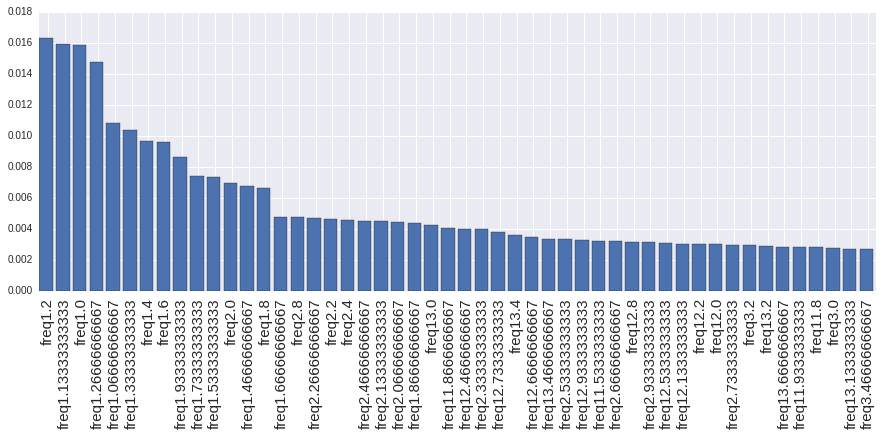

In [44]:
plt.figure(figsize=(15, 5))

ordering = np.argsort(rf.feature_importances_)[::-1][:50]

importances = rf.feature_importances_[ordering]
feature_names = X_columns[ordering]

x = np.arange(len(feature_names))
plt.bar(x, importances)
plt.xticks(x + 0.5, feature_names, rotation=90, fontsize=15);